## Mutiple Linear Regression

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [89]:
dataset= pd.read_csv(r'C:/Users/Shambhavi/Downloads/datasets/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [90]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [91]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,4].values

C:\Users\Shambhavi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


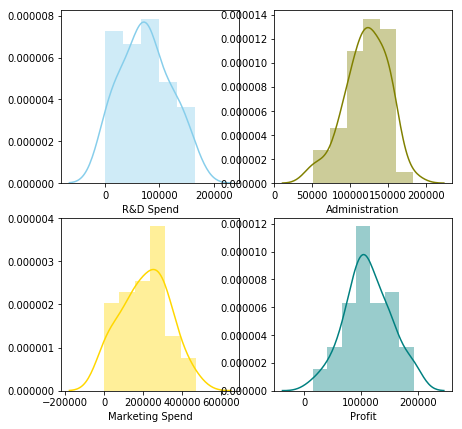

In [92]:
f,axes=plt.subplots(2,2,figsize=(7,7)) #subplots plots graphs in matrices form (here its 2*2)
sb.distplot(dataset["R&D Spend"],color='skyblue',ax=axes[0,0])
sb.distplot(dataset["Administration"],color='olive',ax=axes[0,1])
sb.distplot(dataset["Marketing Spend"],color='gold',ax=axes[1,0])
sb.distplot(dataset["Profit"],color='teal',ax=axes[1,1])

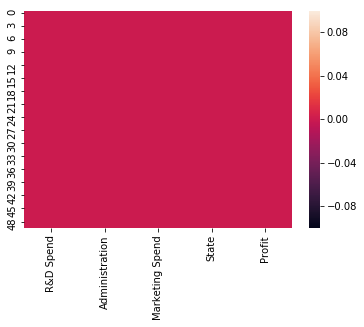

In [93]:
sb.heatmap(dataset.isnull())

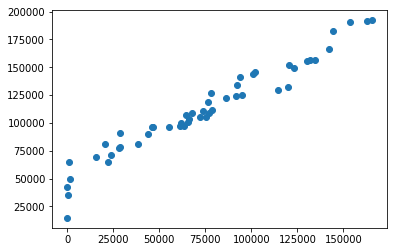

In [94]:
plt.scatter(dataset['R&D Spend'],dataset['Profit'])

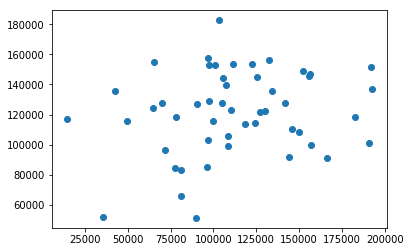

In [95]:
plt.scatter(dataset['Profit'],dataset['Administration'])

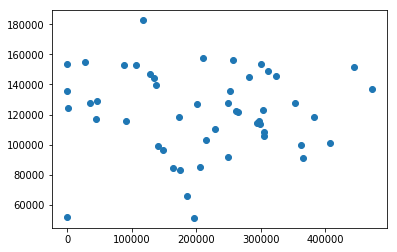

In [96]:
plt.scatter(dataset['Marketing Spend'],dataset['Administration'])

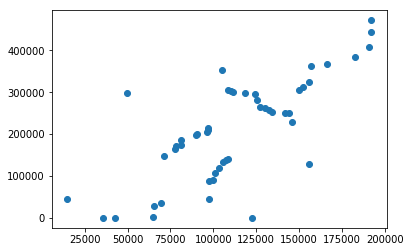

In [97]:
plt.scatter(dataset['Profit'],dataset['Marketing Spend'])

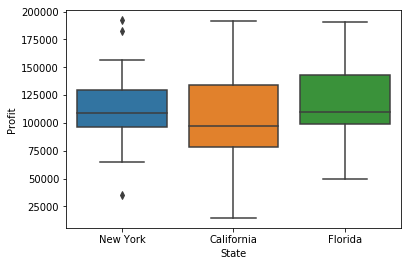

In [98]:
sb.boxplot(data=dataset, x='State',y='Profit')

In [99]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X=LabelEncoder()
X[:,3]=labelencoder_X.fit_transform(X[:,3])
X

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1],
       [131876.9, 99814.71, 362861.36, 2],
       [134615.46, 147198.87, 127716.82, 0],
       [130298.13, 145530.06, 323876.68, 1],
       [120542.52, 148718.95, 311613.29, 2],
       [123334.88, 108679.17, 304981.62, 0],
       [101913.08, 110594.11, 229160.95, 1],
       [100671.96, 91790.61, 249744.55, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [91992.39, 135495.07, 252664.93, 0],
       [119943.24, 156547.42, 256512.92, 1],
       [114523.61, 122616.84, 261776.23, 2],
       [78013.11, 121597.55, 264346.06, 0],
       [94657.16, 145077.58, 282574.31, 2],
       [91749.16, 114175.79, 294919.57, 1],
       [86419.7, 153514.11, 0.0, 2],
       [76253.86, 113867.3, 298664.47, 0],
       [78389.47, 153773.43, 299737.29, 2],
       [73994.56, 122782.75, 30331

In [100]:
# onehotEncoding is done to fit all the values to converted categorical values

onehotencoder=OneHotEncoder(categorical_features=[3])
X=onehotencoder.fit_transform(X).toarray()
X

In [102]:
X=X[:,1:]

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [104]:
X_train

array([[1.0000000e+00, 0.0000000e+00, 5.5493950e+04, 1.0305749e+05,
        2.1463481e+05],
       [0.0000000e+00, 1.0000000e+00, 4.6014020e+04, 8.5047440e+04,
        2.0551764e+05],
       [1.0000000e+00, 0.0000000e+00, 7.5328870e+04, 1.4413598e+05,
        1.3405007e+05],
       [0.0000000e+00, 0.0000000e+00, 4.6426070e+04, 1.5769392e+05,
        2.1079767e+05],
       [1.0000000e+00, 0.0000000e+00, 9.1749160e+04, 1.1417579e+05,
        2.9491957e+05],
       [1.0000000e+00, 0.0000000e+00, 1.3029813e+05, 1.4553006e+05,
        3.2387668e+05],
       [1.0000000e+00, 0.0000000e+00, 1.1994324e+05, 1.5654742e+05,
        2.5651292e+05],
       [0.0000000e+00, 1.0000000e+00, 1.0002300e+03, 1.2415304e+05,
        1.9039300e+03],
       [0.0000000e+00, 1.0000000e+00, 5.4205000e+02, 5.1743150e+04,
        0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 6.5605480e+04, 1.5303206e+05,
        1.0713838e+05],
       [0.0000000e+00, 1.0000000e+00, 1.1452361e+05, 1.2261684e+05,
        2.61

In [105]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
regressor.score(X_test,y_test)

0.9347068473282446

## Backward Elimination

In [107]:
#eliminate insignificant features

In [109]:
import statsmodels.formula.api as sm

In [111]:
X=np.append(arr=np.ones((50,1)).astype(int),values=X,axis=1)

In [113]:
X_opt=X[:,[0,1,2,3,4,5]]  #after adding X0 number of indices becomes 6

In [117]:
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()   #Ordinary list square method
regressor_OLS.summary()                           #exog=independent variable exdog=dependent variable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 30 Jun 2019   Prob (F-statistic):           1.34e-27
Time:                        08:36:01   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
X_opt=X[:,[0,1,3,4,5]]
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()   
regressor_OLS.summary()                           #remove the features with p value greater than significance value(0.05) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 30 Jun 2019   Prob (F-statistic):           8.49e-29
Time:                        08:43:12   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
X_opt=X[:,[0,3,4,5]]
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()   
regressor_OLS.summary()                                            

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 30 Jun 2019   Prob (F-statistic):           4.53e-30
Time:                        08:48:22   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
X_opt=X[:,[0,3,5]]
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()   
regressor_OLS.summary()                           

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 30 Jun 2019   Prob (F-statistic):           2.16e-31
Time:                        08:48:42   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
X_opt=X[:,[3,5]]    # Now we set significance value=0.06
X_opt

array([[165349.2 , 471784.1 ],
       [162597.7 , 443898.53],
       [153441.51, 407934.54],
       [144372.41, 383199.62],
       [142107.34, 366168.42],
       [131876.9 , 362861.36],
       [134615.46, 127716.82],
       [130298.13, 323876.68],
       [120542.52, 311613.29],
       [123334.88, 304981.62],
       [101913.08, 229160.95],
       [100671.96, 249744.55],
       [ 93863.75, 249839.44],
       [ 91992.39, 252664.93],
       [119943.24, 256512.92],
       [114523.61, 261776.23],
       [ 78013.11, 264346.06],
       [ 94657.16, 282574.31],
       [ 91749.16, 294919.57],
       [ 86419.7 ,      0.  ],
       [ 76253.86, 298664.47],
       [ 78389.47, 299737.29],
       [ 73994.56, 303319.26],
       [ 67532.53, 304768.73],
       [ 77044.01, 140574.81],
       [ 64664.71, 137962.62],
       [ 75328.87, 134050.07],
       [ 72107.6 , 353183.81],
       [ 66051.52, 118148.2 ],
       [ 65605.48, 107138.38],
       [ 61994.48,  91131.24],
       [ 61136.38,  88218.23],
       [